# Förderhinweis

Dieses Dokument ist Teil des Lehrmaterials für die **Zusatzqualifikation KI und Maschinelles Lernen.** 

Die Entwicklung und Erprobung dieses Bildungsangebotes wurde vom Bundesministerium für Bildung und Forschung im Rahmen des InnoVET-Programms gefördert.

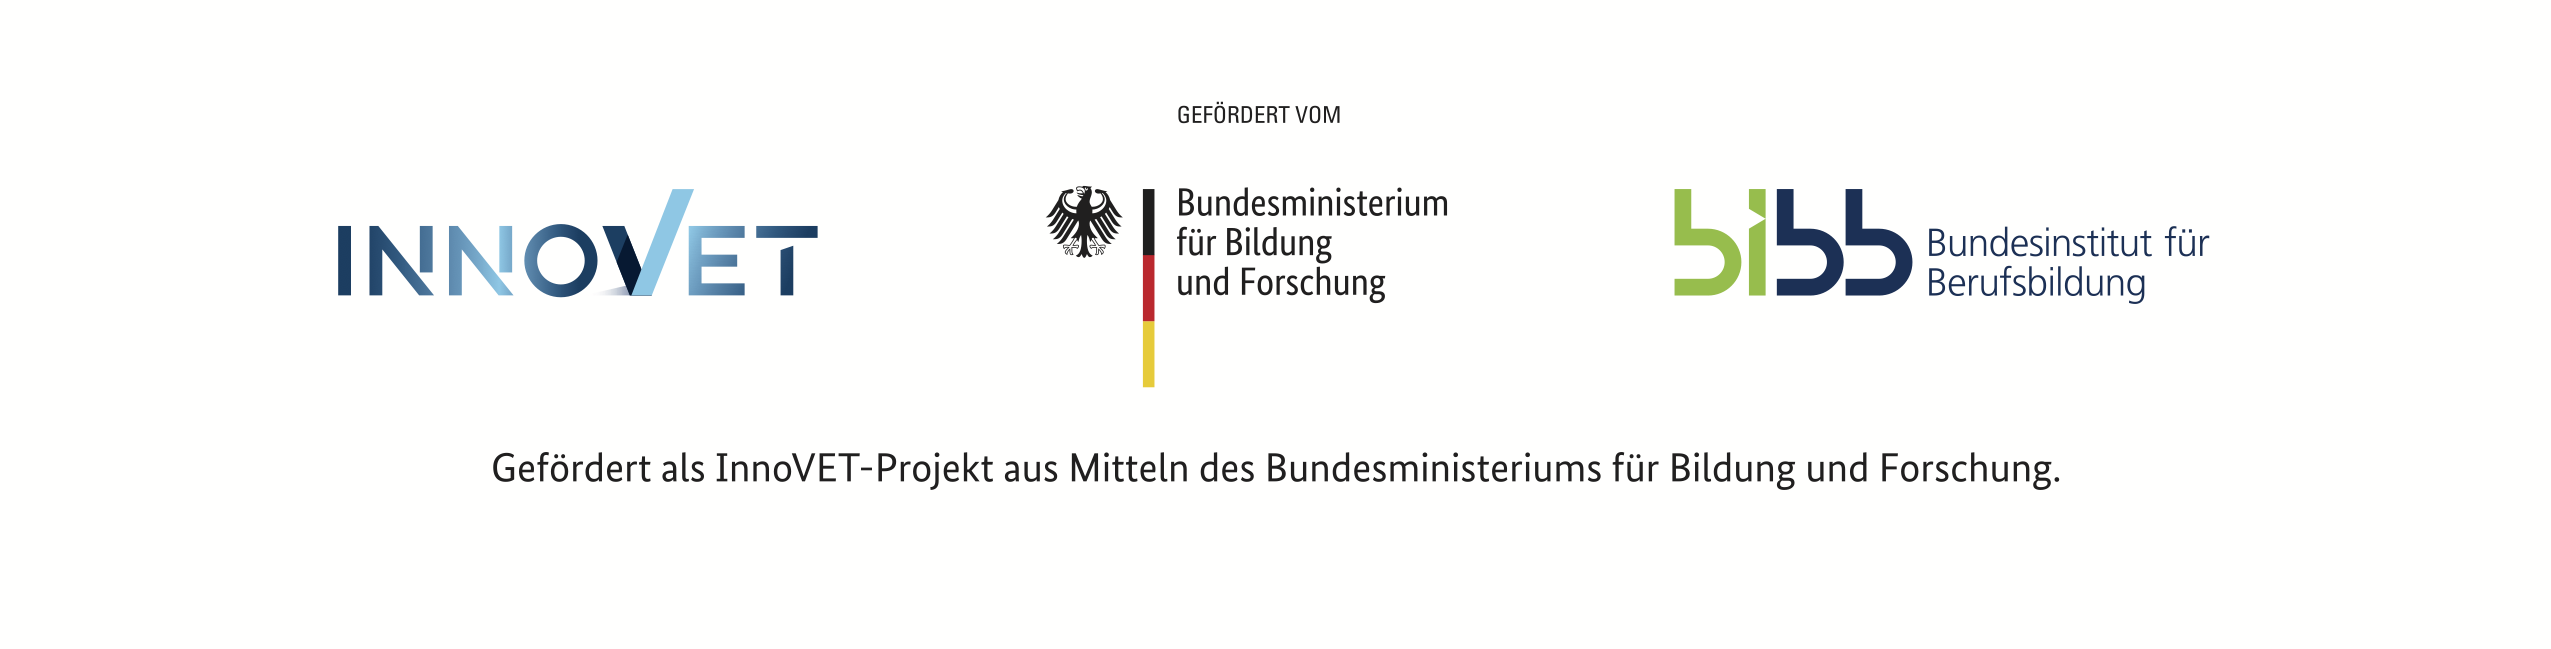

# Lizenzhinweis

Dieses Notebook "Daten analysieren" wurde von Antje Schweitzer, KI B3 / Universität Stuttgart, erstellt. 

Das Werk, mit Ausnahme der oben abgebildenten Förderlogos, ist lizenziert unter [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/deed.de) (Namensnennung 4.0 International)

# Daten analysieren

Wenn man mit Daten arbeitet, ist es wichtig, eine gute Vorstellung davon zu bekommen, welche Eigenschaften die Daten haben: welche Werte stecken in der Tabelle, wie viele Datenpunkte liegen überhaupt vor, sind die Daten vollständig, gibt es unerwartete Werte, usw.

Wir schauen uns in diesem Dokument als erstes an, wie man mit einem einfachen `pandas`-Befehl ein paar erste statistische Informationen über Daten bekommen kann. 

## Grundlegende statistische Angaben zu den Daten bekommen



### Daten laden

Wir importieren zunächst die Wetterdaten, die Sie schon aus der Aufgabe aus dem letzten [Notebook](https://colab.research.google.com/drive/1HV5H_6W-xBzR3S0CZYhkDRhBg11So0BQ?usp=sharing) kennen. Dafür benötigen wir wieder die `pandas`-Bibliothek. Außerdem gestalten wir den Aufruf von `pandas.read_csv` minimal übersichtlicher und üben dabei gleich den Umgang mit Variablen: anstatt der Funktion die URL als String zu übergeben, führen wir erst eine Variable namens `wetter_url` ein, in der wir diesen String speichern. Und dann steht im Funktionsaufruf von `pandas.read_csv` nicht mehr der String selbst, sondern nur noch die Variable, in der er gespeichert ist. 

Dabei muss natürlich bei der Variablenzuweisung der String selbst in Anführungszeichen geschrieben werden, denn Python soll den String bei der Zuweisung einfach nur lassen, wie er ist. Die Variable, in der der String dann gespeichert ist, wird der Funktion im Code aber ohne Anführungszeichen übergeben. Python wertet die Variable erst dann aus, wenn der Code ausgeführt wird, so dass `read_csv` (für uns nicht mehr sichtbar, sozusagen hinter den Kulissen) nicht mehr die Variable, sondern die ausgewertete Variable und damit ihren Inhalt, also den String samt Anführungszeichen übergeben bekommt. 

Was gewinnt man dabei, wenn man read_csv eine vorher definierte Variable übergibt? Der Code wird etwas **lesbarer**, vor allem, wenn man den Variablen aussagekräftige Namen gibt. Außerdem könnte es ja sein, dass man später die Daten nochmal einlesen will, und dann muss man sich nicht die URL selbst merken und als Argument übergeben, sondern nur den einfacheren Namen der Variablen. Und falls sich jemals die URL für die Daten ändert, muss man diese **nur noch an einer Stelle im Code ändern** - dort, wo die Variable zugewiesen wird, selbst wenn man evtl. mehrfach von der URL Daten lädt.  




---

**Es ist sinnvoll, Werte, die mehrfach verwendet werden, in Variablen zu speichern. Manchmal wird auch der Code lesbarer durch aussagekräftig benannte Variablen.**

---


In [ ]:
# Importieren der pandas-Bibliothek
import pandas

# URL in Variable wetter_url speichern
wetter_url = 'https://github.com/antje-schweitzer/wetterdaten/raw/main/wetterdaten.csv'
# und an read_csv übergeben
wetter = pandas.read_csv(wetter_url,index_col=0)

# Ergebnis anzeigen lassen (diesmal nur "quick and dirty", ohne print-Befehl)
wetter

,Max,Wolken
Datum,,
2009-07-01,28.7,3.0
2009-07-02,29.5,2.3
2009-07-03,28.5,3.9
2009-07-04,27.9,2.8
2009-07-05,26.6,5.5
...,...,...
2020-06-25,26.5,1.1
2020-06-26,29.8,3.6
2020-06-27,28.8,3.6


Die Wetterdaten stammen übrigens von einer Stuttgarter Wetterstation (bereitgestellt vom Deutschen Wetterdienst, für Details siehe https://github.com/antje-schweitzer/wetterdaten/ bzw. https://www.dwd.de/DE/leistungen/opendata/opendata.html) und zeigen Tageshöchsttemperaturen (Spalte Max) und Werte für den Grad an "Bedecktheit" (Spalte Wolken) - je höher der Wert für Wolken, desto stärker bedeckt war der Himmel. 

### Statistik mit der describe-Methode aus pandas

Die `pandas`-Bibliothek bietet eine Funktion, die für ein DataFrame-Objekt ein paar übliche statistische Eigenschaften berechnen kann. Die Methode heißt `describe`. Wie alle Methoden, z.B. auch die Methoden `head` und `tail` aus dem vorhergehenden Notebook, schreibt man sie mit einem Punkt hinter das Objekt. Da es sich um Funktionen handelt, die manchmal noch zusätzliche Argumente bekommen, braucht man hier immer anschließend noch Klammern ().  

In [ ]:
# zeige ein paar statistische Eigenschaften des wetter DataFrames
wetter.describe()

,Max,Wolken
count,4017.000000,3996.000000
mean,15.538860,5.456156
std,8.761799,2.351702
min,-10.100000,0.000000
25%,8.600000,3.900000
50%,15.700000,6.200000
75%,22.300000,7.500000
max,38.800000,8.000000


Was sehen wir hier? Wir sehen, dass der in der Variable wetter gespeicherte DataFrame zwei Spalten hat: Max und Wolken. Wir sehen außerdem, dass es in der Spalte Max 4017 Werte gibt und in der Spalte Wolken 3996 - diese beiden Werte kann man der Zeile `count` entnehmen. Diese Zahlen sollten uns stutzig machen - wieso haben wir nicht gleich viele Werte? Eine Tabelle hat doch in jeder Spalte gleich viele Zeilen! 

Die Antwort ist: es gibt zwar in beiden Spalten gleich viele Zeilen, aber in manchen Fällen steht dort einfach kein (gültiger) Wert - die entsprechende Zelle ist sozusagen leer. (Tatsächlich werden Sie unten sehen, dass wir sie nicht als leer angezeigt bekommen werden - wir werden dort den Vermerk 'NaN' sehen, für "Not a Number". Das bedeutet aber im Prinzip dasselbe - kein Wert.)

Wir werden uns unten gleich um diese fehlenden Werte kümmern, aber vorher besprechen wir noch kurz, was uns `describe` sonst noch an Informationen zur Verfügung gestellt hat. Die Zeile `mean` gibt uns für beide Spalten separat die jeweiligen Mittelwerte an: der Mittelwert für Max (also die durchschnittliche Tageshöchsttemperatur) ist 15.538860, und der durchschnittliche Wert für Wolken ist 5.456156. Die Zeilen `min` und `max` zeigen uns jeweils das Minimum bzw. das Maximum in den beiden Spalten - es war also nie heißer als 38.8 Grad, und der kälteste Höchstwert war bei -10.1 Grad. Für die Wolken dagegen bewegen sich die Werte offensichtlich zwischen 0 und 8. 

Die Zeilen `std` sowie die Zeilen mit den Prozentangaben zeigen die Standardabweichung bzw. bestimmte Perzentile - was das ist, lernen wir erst später im Kurs. 

Man kann sich statistische Merkmale wie den Mittelwert, die Anzahl, Minimum und Maximum auch ganz einfach direkt holen:


In [ ]:
# Anzahl der Werte in jeder Spalte: mit der Methode count():
wetter.count()

Max       4017
Wolken    3996
dtype: int64

In [ ]:
# Mittelwert in jeder Spalte: mit der Methode mean():
wetter.mean()

Max       15.538860
Wolken     5.456156
dtype: float64

In [ ]:
# Minimum der Werte in jeder Spalte: mit der Methode min():
wetter.min()

Max      -10.1
Wolken     0.0
dtype: float64

In [ ]:
# Maximum der Werte in jeder Spalte: mit der Methode max():
wetter.max()

Max       38.8
Wolken     8.0
dtype: float64

### Problem mit fehlenden Werten

Kommen wir zurück zu den fehlenden Werten. Wenn man mit echten Daten arbeitet, kommt es häufig vor, dass sie fehlende oder ungültige Werte enthalten. Solche Werte erfordern oft etwas Aufmerksamkeit, damit sie das Training von KI-Modellen nicht beeinflussen. 

---

**Fehlende Werte können beim Training von KI-Modellen ein Problem sein.**

----


Wenn man es mit fehlenden Werten zu tun hat, ist es sinnvoll, zunächst einmal zu überprüfen, in welchen Zellen sie auftauchen. Wenn es sich um große Datenmengen handelt, braucht man dafür einen Weg, gezielt Zeilen oder Spalten auszugeben, die bestimmte Kriterien erfüllen, denn sonst sucht man die Stecknadel im Heuhaufen. 

[Bisher](https://colab.research.google.com/drive/1HV5H_6W-xBzR3S0CZYhkDRhBg11So0BQ?usp=sharing) haben wir zwei Möglichkeiten kennengelernt, gezielt Werte aus Tabellen ausgeben zu lassen: über den Spaltennamen einerseits, oder über den Index bzw. die Zeilennummer andererseits. Beides hilft uns hier nicht weiter: wir wissen ja noch nicht, in welchen Spalten oder Zeilen die Werte fehlen. 

Wir brauchen daher eine Möglichkeit, gezielt Werte aus der Tabelle anzusehen, die bestimmte Eigenschaften haben. Diese Möglichkeit bietet die sogenannte Boolesche Indizierung (Englisch: Boolean Indexing), die wir im Folgenden besprechen. 



## Boolesche Indizierung für DataFrames

Bei der Indizierung geht es darum, auf bestimmte Zeilen einer Tabelle oder eines DataFrames zuzugreifen, oder auch, bestimmte Zeilen auszuwählen - was wir ja bereits im letzten Notebook getan haben. Der Fachausdruck hierfür ist "Indizierung". 

---

**Indizierung bedeutet, bestimmte Zeilen in einer Tabelle auszuwählen.**

---

### Einen DataFrame von Hand anlegen

Bevor wir wieder zu den Wetterdaten kommen, probieren wir den Zugriff auf bestimmte Werte an einer kleinen Spiel-Tabelle aus - wir nehmen die, die Sie schon aus dem letzten Notebook kennen. 

```
Janina, 23, Joghurt
Max, 17, Pistazie
Özlem, 21, Erdbeer
```


Allerdings haben wir diese Daten noch nicht in einem DataFrame; den müssen wir also erst erstellen. Es gibt verschiedene Methoden, von Hand einen DataFrame anzulegen, eine populäre Methode ist, dafür ein sogenanntes Python Dictionary zu verwenden. Dictionarys (auf Deutsch eigentlich: Wörterbücher) sind dazu da, zu bestimmten Schlüsselwörtern Werte nachschlagen zu können, so wäre z.B. denkbar, ein Dictionary zu haben, in dem Lieblingseissorten nachgeschlagen werden können - in etwa also so:

* Janina: Joghurt
* Max: Pistazie
* Özlem: Erdbeer

Wichtig dabei ist, dass die Schlüssel (also die Wörter links vom Doppelpunkt) eindeutig sind - in unserem Fall dürften also keine zwei Personen dieselben Namen haben. Das sähe dann als Python Dictionary so aus: 

In [ ]:
# Das Dictionary definieren
dict = { 'Janina' : 'Joghurt', 
        'Max' : 'Pistazie', 
        'Özlem' : 'Erdbeer'}

# Eintrag für Janina nachschlagen:
dict["Janina"]

'Joghurt'

Die Definition in Python funktioniert immer so: das ganze Dictionary steht in geschweiften Klammern. Die Einträge bestehen aus einem Schlüssel und einem dazugehörigen Wert. Die Schlüssel müssen Strings sein. Die Werte für die Schlüssel sind beliebig. Schlüssel und Werte zu den Schlüsseln werden durch Doppelpunkte getrennt, und die verschiedenen Einträge wiederum durch Kommas. Probieren Sie es aus und definieren ein Dictionary, in dem Sie für sich und enge Freunde nachschlagen können, wie alt sie sind - die Schlüssel sollten also wie oben Namen sein, aber die Werte dazu wären dann Zahlen statt Strings. 

In [ ]:
# schreiben Sie hier den Code hin: 
mein_dict = 

SyntaxError: ignored

---

**Dictionaries sind dazu gedacht, zu bestimmten eindeutigen Schlüsselwörtern Werte zu speichern.**

---


Um nun manuell einen DataFrame zu erstellen, treibt man diese Idee ein bisschen weiter und interpretiert jeden Schlüssel als Spaltennamen. Das ist sinnvoll, denn auch Spaltennamen sollten eindeutig sein. Und statt als Nachschlag-Ergebnis für die Schlüssel nur einen String als Wert einzutragen, wie oben z.B. die jeweilige Lieblingseissorte, schreibt man einfach alle Werte der Spalte als Liste aus: 



In [ ]:
# Das Dictionary definieren
dict = { 'Name': ['Janina', 'Max', 'Özlem'],
        'Alter': [ 23, 17, 21],
        'Lieblingseis': ['Joghurt', 'Pistazie', 'Erdbeer']}

# Eintrag (also Werte) für Name nachschlagen
dict["Name"]

['Janina', 'Max', 'Özlem']

Ein so definiertes Python Dictionary kann ganz leicht mit der Funktion `pandas.DataFrame()` in einen DataFrame umgewandelt werden, dabei übergibt man das Dictionary einfach als Argument:

In [ ]:
# in DataFrame umwandeln und diesen in der Variable eissorten speichern
eissorten = pandas.DataFrame(dict)
print(eissorten)

     Name  Alter Lieblingseis
0  Janina     23      Joghurt
1     Max     17     Pistazie
2   Özlem     21      Erdbeer


Da es sich jetzt um einen DataFrame handelt, haben wir nun die Möglichkeit, über den DataFrame etwas Statistik zu machen, und zwar wie oben durch die Methode `describe`. Wir sehen in einem Fall wie hier, wo wir Spalten mit Zahlen und Spalten mit Strings haben, nur eine Zusammenfassung für die Spalte mit Zahlen. 


In [ ]:
eissorten.describe()


,Alter
count,3.000000
mean,20.333333
std,3.055050
min,17.000000
25%,19.000000
50%,21.000000
75%,22.000000
max,23.000000


Wandeln Sie nun Ihr oben definiertes Dictionary ebenfalls in einen DataFrame um. Sie müssen also ihre oben definierte Variable `mein_dict` übergeben satt der hier verwendeten Variable `dict`.  Verwenden Sie anschließend die Methode `describe`, um daraus das Durschschnittsalter Ihrer Gruppe zu entnehmen. 

In [ ]:
# mein_dict in einen DataFrame umwandeln:
... schreiben Sie hier den Code hin
# diesmal verwenden wir für die Ausgabe print, 
# damit die Daten auch ausgegeben werden, 
# wenn Sie unten den nächsten Befehl ergänzen
print(mein_dict)

# und Statistik anzeigen lassen:
... schreiben Sie hier den Code hin

---
**Dictionaries können in DataFrames umgewandelt werden. In dem Fall geben die Schlüssel die Spaltennamen an. Die Werte für die Schlüssel sind (gleich lange) Listen von Werten. Diese Listen geben die Daten in der jeweiligen Spalte an.** 

---

### Zugriff über Boolesche Werte

Wir haben schon gesehen, dass man über den Index gezielt einzelne Zeilen aus einem DataFrame extrahieren kann, z.B. nur die Zeile 0 - dafür spezifiziert man bei `loc` den gewünschten Index (also die Nummer der Zeile) in einer einfachen eckigen Klammer. Hier nochmal kurz gezeigt:

In [ ]:
# die Werte für eine einzelne Zeile (hier Zeile Null, also die erste)
eissorten.loc[0]

Name             Janina
Alter                23
Lieblingseis    Joghurt
Name: 0, dtype: object

Genauso kann man auch mehrere Zeilen extrahieren; in dem Fall spezifiziert man in den eckigen Klammern nicht eine einzelne Zahl, sondern eine Liste von Zahlen. Und da Listen in eckigen Klammer stehen, hat man nun doppelte eckige Klammern. Auch das noch einmal wiederholt:

In [ ]:
# die Werte für eine Liste von Zeilen (hier für [0, 1])
eissorten.loc[[0,1]]

,Name,Alter,Lieblingseis
0,Janina,23,Joghurt
1,Max,17,Pistazie


Für den Fall, dass Sie es irritierend finden, dass wir beim Zugriff auf eine Liste von Zeilen doppelte Klammern brauchen, hilft vielleicht folgende Überlegung. Mithilfe einer Variablenzuweisung kann man schön sehen, dass diese doppelten Klammern daher kommen, dass nun eine Liste übergeben wird:

Speichert man die Liste der Zeilen erst in einer Variable `vielezeilen`, dann kann man die Variable als Argument für `loc` angeben. Diese muss dann nur in eine  einfache eckige Klammer, aber da die Variable selbst ja noch die Liste mit den eckigen Klammern enthält, bekommt Python beim Auswerten (hinter den Kulissen) wieder die doppelten Klammern... Genauso sieht es aus, wenn man eine Variable `einezeile` definiert, die nur einen Wert enthält, ohne Klammern also. Auch hier bekommt loc diese Variable in einer einfachen Klammer übergeben, wie man in der folgenden Zelle sehen kann. 

In [ ]:
print('Einmal mit mehreren Zeilen')
print('==========================') 
vielezeilen = [0,1]
print(eissorten.loc[vielezeilen])
print('--------------------------') 

print('Einmal mit nur einer Zeile')
print('==========================') 
einezeile = 0
print(eissorten.loc[einezeile])

Einmal mit mehreren Zeilen
     Name  Alter Lieblingseis
0  Janina     23      Joghurt
1     Max     17     Pistazie
--------------------------
Einmal mit nur einer Zeile
Name             Janina
Alter                23
Lieblingseis    Joghurt
Name: 0, dtype: object


Wir lernen nun noch eine neue Möglichkeit kennen, gezielt auf Zeilen zuzugreifen, nämlich über Boolesche Werte (auch genannt: Wahrheitswerte). Boolesche Werte gibt es nur zwei: True (wahr) und False (falsch). Wenn man Wahrheitswerte für die Auswahl von Zeilen angibt, bedeutet True "gib diese Zeile aus" und False "gib diese Zeile nicht aus". Damit klar ist, welche Zeilen gemeint sind, müssen wir eine Liste von Booleschen Werten übergeben, die genauso lang ist wie die Tabelle (übrigens kann man dann auch von einem Vektor sprechen statt von einer Liste - Vektoren sind im Prinzip Listen mit einer vordefinierten festen Länge). 

In unserem Fall brauchen wir also einen Vektor oder eine Liste mit 3 Wahrheitswerten, weil unsere Tabelle 3 Zeilen lang ist. Das kann zum Beispiel wie hier aussehen:

In [ ]:
eissorten.loc[[True,True,False]]

,Name,Alter,Lieblingseis
0,Janina,23,Joghurt
1,Max,17,Pistazie


Wir haben also erfolgreich nur die ersten beiden Zeilen dargestellt und die letzte ignoriert - der Vektor war [True, True, False]. 

Das bringt uns für unsere obiges Problem (bestimmte Zeilen aus einer Tabelle mit über 4000 Zeilen auswählen) nicht weiter - es sei denn, man will von Hand eine Liste mit über 4000 Wahrheitswerten erstellen... 

Aber in Kombination mit den logischen Ausdrücken, die wir im nächsten Abschnitt kennenlernen, wird dann auch dieses Problem gelöst. 

---

**Boolesche Werte oder auch Wahrheitswerte sind entweder True (wahr) oder False (falsch). Mithilfe von Vektoren von Booleschen Werten kann man gezielt Zeilen aus DataFrames indizieren. Die Länge des Vektors muss jeweils mit der Anzahl der Zeilen im DataFrame übereinstimmen.**

---



### Logische Operationen auf DataFrames

Logische Ausdrücke sind Ausdrücke, die entweder wahr oder falsch sind. Folgende Beispiele sind logische Ausdrücke:

* Es regnet.
* 7 ist größer als 3. 
* New York liegt in Frankreich. 
* Ich bin 18 Jahre alt. 
* Der Inhalt der Variable `var` ist gleich 3. 
* Dieses Dokument ist kein Jupyter Notebook. 
* Ein Jupyter Notebook kann sowohl Text als auch Code enthalten. 

Für manche dieser Ausdrücke können wir hier nicht entscheiden, ob sie wahr oder falsch sind - es kommt auf die Situation an, in der sie ausgewertet werden. "Es regnet" ist wahr in einer Situation, in der es regnet, und sonst falsch. "Ich bin 18 Jahre alt" ist nur wahr für 18jährige. Und "Der Inhalt der Variable `var` ist gleich 3" ist nur wahr, wenn die Variable diesen Wert auch tatsächlich zugewiesen bekommen hat. "Dieses Dokument ist kein Jupyter Notebook" ist falsch, wenn der Ausdruck in dem Jupyter Notebook steht, das Sie gerade lesen, aber zum Beispiel wahr, wenn er in einer Excel-Tabelle steht.  


---

**Die Auswertung von logischen Ausdrücken ergibt Boolesche Werte.**

---


---

👥👥👥 Diskutieren Sie in der Gruppe: welche der oben stehenden Ausdrücke sind in unserer Welt immer wahr?

---

Logische Ausdrücke bekommt man in der Mathematik durch die Anwendung von logischen Operatoren (wie "ist gleich", "ist ungleich", "ist größer", "ist kleiner", ...) auf Werte. Die Anwendung eines solchen Operators nennt man logische Operationen. Beispiele für logische Operationen sind:

* 7 == 3 (Ergebnis: False)
* 3 == 3 (Ergebnis: True)
* 7 != 3 (Ergebnis: True) (!= bedeutet in Python und vielen anderen Programmiersprachen "ist ungleich")
* 1 < 3 (Ergebnis: True)
* 9 > 3 (Ergebis: False)

---

**Logische Ausdrücke bildet man beim Programmieren unter anderem mithilfe logischer Operatoren wie ==, !=, <, >. Es gibt aber auch Funktionen, die als logische Operatoren fungieren.**

---

Bitte beachten Sie, dass der Gleichheitsoperator (also das Gleichheitszeichen, mit dem hier die beiden Seiten verglichen werden) in Python und in fast allen Prorammiersprachen als doppeltes Gleichheitszeichen geschrieben wird. Das liegt daran, dass das einfache Gleichheitszeichen für Variablenzuweisungen reserviert ist. Wir probieren es hier aus:


In [ ]:
# Die folgende Zeile wird zu einem Fehler führen:
7 = 3

SyntaxError: ignored

Die obige Zeile gibt einen Fehler aus: "can't assign to literal", zu Deutsch: kann nicht einem feststehenden Wert zuweisen. Das bedeutet, dass Python einer feststehenden Zahl wie 7 keinen Wert 3 zuweisen kann. Mit dem doppelten Gleichheitszeiten funktioniert der Vergleich aber: 

In [ ]:
7 == 3

False

Man kann natürlich auch Variablen mit Werten vergleichen oder Variablen miteinander:

In [ ]:
# hier kommen Variablenzuweisungen, also einfache Gleichheitszeichen!
zahl1 = 7
zahl2 = 3

# nun vergleichen wir sie:
print(zahl1 == zahl2)
print(zahl1 < zahl2)
print(zahl1 > zahl2)

False
False
True



In diesen Beispielen haben wir nur Operationen mit einzelnen Werten gesehen, aber man kann solche Operationen auch "in einem Rutsch" auf DataFrames anwenden, z.B. auf eine Spalte, und bekommt dann als Ergebnis einen Vektor, der die Ergebnisse für alle Zeilen enthält. Übrigens kann man auch die Spalte selbst als Vektor verstehen, denn auch sie hat die vom DataFrame vorgegebene Länge. 


In [ ]:
eissorten['Alter']>20

0     True
1    False
2     True
Name: Alter, dtype: bool

Wir sehen als Ergebnis einen Vektor mit drei Booleschen Werten - also für jede Zelle in der Spalte einen Wert. Der Wert gibt jeweils an, ob das Element in der Zelle größer als 20 war oder nicht. Da dieser Wert logischerweise dieselbe Länge hat wie die Tabelle, können wir ihn direkt verwenden, um nur die Zeilen des DataFrames darzustellen, für die das Ergebnis True war - also die Zeilen, die zu Personen gehören, die älter als 20 sind. 

In [ ]:
eissorten.loc[eissorten['Alter']>20]

,Name,Alter,Lieblingseis
0,Janina,23,Joghurt
2,Özlem,21,Erdbeer


Wir halten also fest: 

---

**Das Ergebnis einer logischen Operation auf einer Spalte eines DataFrame ergibt eine Liste von exakt der Länge der Spalte. Man kann diese Liste auch als Vektor bezeichnen, da es sich um eine Liste mit einer festen Länge handelt. Aus demselben Grund kann auch die Spalte selbst als Vektor bezeichnet werden.**

---

Und: 

---

**Vektoren von Booleschen Werten können zur Indizierung von DataFrames genutzt werden.**

---



Genauso können wir den Gleichheitsoperator statt dem ">" verwenden, um die Zeilen auszugeben, in denen die Lieblingseissorte Erdbeer ist:

In [ ]:
# erst den Vektor mit Booleschen Werten ansehen, für Interessierte
print(eissorten['Lieblingseis']=='Erdbeer')

# und damit die gewünschten Zeilen mit loc spezifizieren
eissorten.loc[eissorten['Lieblingseis']=='Erdbeer']

0    False
1    False
2     True
Name: Lieblingseis, dtype: bool


,Name,Alter,Lieblingseis
2,Özlem,21,Erdbeer


Probieren Sie es selbst: geben Sie die Zeile aus, in der der Name Max ist. 

In [ ]:
## alle Zeilen ausgeben, in denen der Name Max ist



## Fehlende Werte finden

Das Einzige, was uns nun noch fehlt, ist eine logische Operation, die uns sagt, ob ein Wert ein fehlender Wert ist oder nicht. Das klingt widersprüchlich - wenn wir über einen Wert sprechen, muss er doch vorhanden sein??

Wenn Daten erhoben werden, kommt es oft vor, dass Werte fehlen - jemand hat beim Ausfüllen eines Formulars vergessen, ein Kreuzchen an einer Stelle zu machen. Oder ein Sensor, dessen Werte laufend gespeichert werden, fällt aus und liefert zu einem bestimmten Zeitpunkt doch keinen Wert. Oder ein Wert wird durch einen Fehler versehentlich gelöscht. Eine Information, die irgendwo eingetragen werden soll, ist einfach nicht verfügbar. 

Theoretisch könnte in all diesen Fällen in der entsprechenden Tabelle einfach eine Zelle leer bleiben. Dennoch ist es üblich, in solchen Fällen etwas in die Zelle einzutragen. Dies könnte auch ein Vermerk sein wie "fehlt" oder "Fehler" oder "Sensorausfall". Gegenüber der Lösung mit der leeren Zelle ist dann wenigstens klar, dass der Wert aus einem bestimmten Grund fehlt. Es hat sich allerdings in der Datenanalyse etabliert, solche Werte nicht beliebig zu benennen, sondern sie mit einem Symbol zu ersetzen, das klar stellt, dass der Wert in der betreffenden Zelle nicht geeignet ist, in irgendwelche Berechnungen einbezogen zu werden. Warum ist das sinnvoll? 

Stellen Sie sich vor, wir fügen in die Tabelle eine neue Zeile ein, in der der Wert für das Alter fehlt. Wenn wir hier einen Vermerk wie 'unbekannt' eintragen, als String, haben wir das Problem, dass wir plötzlich eine Spalte haben, die nicht mehr nur Zahlen enthält, sondern auch einen String. 
Es ist in Python übrigens nicht möglich, die Zelle wirklich leer zu lassen - man kann höchstens noch versuchen, einen leeren String anzugeben, aber man bekommt dann dasselbe Problem wie bei der Lösung mit 'Fehler', denn auch der leere String ist eben ein String. 

Tragen wir also den String 'unbekannt' ein: 

In [ ]:
# eissorten hatte bisher nur 3 Zeilen (also Index von 0 bis 2)
# füge jetzt von Hand eine weitere Zeile mit Index 3 dazu:
eissorten.loc[3]=['Sascha','unbekannt','Schoko']
eissorten

,Name,Alter,Lieblingseis
0,Janina,23,Joghurt
1,Max,17,Pistazie
2,Özlem,21,Erdbeer
3,Sascha,unbekannt,Schoko


Das sieht erst mal harmlos aus, führt aber zu Problemen: zum Beispiel, wenn man versucht, nun den Mittelwert für die Spalte 'Alter' zu berechnen. In der folgenden Zelle können Sie sehen, dass wir nun einen Fehler bekommen. Das Problem ist, dass man in der Spalte  nicht mehr ausschließlich Zahlen hat - wie soll aber dann der Mittelwert berechnet werden? Dafür müssten ja alle Werte in der Spalte aufaddiert und anschließend durch die Anzahl geteilt werden - aber wie addiert man 'Fehler' zu 23, 17 und 21? Darüber beschwert sich Python hier unten - eine Zahl und ein String können nicht addiert werden. 


In [ ]:
eissorten['Alter'].mean()

TypeError: ignored

Die Lösung besteht daher darin, solche Werte explizit als fehlend zu markieren. Das ist aus Gründen wie dem Problem oben in der Datenwissenschaft absoluter Standard. Die Bezeichnung für diese Werte variiert: oft heißen sie N/A, NA, n.a., oder na - alles Abkürzungen für "not available" - "nicht verfügbar".  Falls Sie sich die Mühe machen wollen: in den Wetterdaten im CSV-Format unter der URL oben sind diese Werte als NA bezeichnet. In Python heißt die Bezeichnung `NaN` für "Not a Number", und read_csv hat daher beim Einlesen alle NA-Werte in NaN konvertiert. 



---

**Fehlende Werte, bzw. Werte, die nicht in Berechnungen einfließen sollten, werden in der Datenanalyse mit NA (not available) oder NaN (not a Number) gekennzeichnet.**

---

Statt beim Einlesen kann der NaN-Wert auch manuell in einen DataFrame eingetragen werden. Der Wert wird von einer anderen sehr verbreiteten Bibliothek zur Verfügung gestellt: von der Bibliothek `numpy` - diese ist für numerische Berechnungen in Python gedacht. Wir ergänzen nun die letzte Zeile in unserem DataFrame mit dem `NaN`-Wert aus der numpy-Bibliothek; dort heißt der Wert `nan`. Um Python mitzuteilen, dass wir den Wert aus der numpy-Bibliothek meinen und keinen anderen, stellen wir wie üblich `numpy.` voran, also `numpy.nan`. 

Bevor wir diesen Wert in unserer Tabelle ergänzen, müssen wir leider erst noch Python beibringen, dass die Spalte für das Alter keine Spalte mit Strings sein soll, denn seit wir oben den String 'Fehler' eingefügt haben, gilt die Spalte für Python als String. Am schnellsten geht das, indem wir einfach nochmal kurz das ursprüngliche Dictionary in einen DataFrame umwandeln, so dass die Spalte wieder als Zahlen-Spalte gilt.

In [ ]:
# eissorten DataFrame schnell nochmal korrekt erzeugen
# nur Zahlen in der Spalte für das Alter
eissorten = pandas.DataFrame(dict)

# wir brauchen nun den nan Wert aus der numpy-Bibliothek
import numpy
# Zeile 4 ergänzen, mit nan in der mittleren Spalte 
eissorten.loc[3]=['Sascha',numpy.nan,'Schoko']
eissorten

,Name,Alter,Lieblingseis
0,Janina,23.0,Joghurt
1,Max,17.0,Pistazie
2,Özlem,21.0,Erdbeer
3,Sascha,NaN,Schoko


Mit dem Vermerk NaN funktioniert nun auch wieder die Berechnung statistischer Maße wie des Mittelwerts - diese Funktionen wissen, dass NaN für fehlende Werte steht und bei der Berechnung einfach ignoriert werden kann. 

In [ ]:
eissorten['Alter'].mean()

20.333333333333332

Zum Auffinden von solchen Werten stellt `pandas` eine Methode zur Verfügung: die Methode `isna` überprüft, ob ein Wert ein NaN-Wert ist. Sie ist also ein logischer Operator, denn sie liefert True, wenn es sich um einen NaN-Wert liefert und False, wenn es sich um einen normalen Wert oder String handelt. Wenn wir diese Methode auf den ganzen DataFrame anwenden, sehen wir für alle Zellen, ob sie NaN sind. Und tatsächlich sehen wir unten in der Mitte der letzten Zeile nun, dass der Wert für das Alter ein NaN-Wert ist: denn hier steht True - für alle anderen Zellen hat `isna` natürlich False zurückgeliefert. 

In [ ]:
eissorten.isna()


,Name,Alter,Lieblingseis
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False


Hiermit können wir nun gezielt alle Zeilen anzeigen in denen für das Alter ein NaN steht - wir produzieren zunächst einen Vektor mit Booleschen Werten (also True bzw. False) für die Spalte mit dem Alter und nehmen diese anschließend zur Indizierung des DataFrames:

In [ ]:
# Booleschen Vektor erstellen für die NaN-Zeilen
zeilen_mit_na = eissorten['Alter'].isna()
# diesen Vektor für loc nutzen
eissorten.loc[zeilen_mit_na]


,Name,Alter,Lieblingseis
3,Sascha,NaN,Schoko


Nun sollten Sie eigentlich in der Lage sein, dasselbe für die Wetterdaten zu tun: lassen Sie nur die Zeilen ausgeben, in denen der Wert für die Bewölkung fehlt, in denen also der Wert in der Spalte Wolken NaN ist. Ergänzen Sie dazu den Code in der folgenden Zelle:

In [ ]:
# in dieser Variable befinden sich die Wetterdaten von oben:
wetter

# dies ist die Spalte mit den Wolken - ergänzen Sie hier die Methode isna 
# so dass Sie einen Booleschen Vektor bekommen
# da Sie den Vektor wie vorgeschlagen in der Variable zeilen_mit_na speichern, 
# wird er nicht direkt ausgegeben - falls Sie ihn ansehen wollen, 
# müssen Sie mit print() arbeiten
zeilen_mit_na = wetter['Wolken'].bitte hier ergänzen

# verwenden Sie dann loc, um nur diese Zeilen auszugeben wie oben


SyntaxError: ignored

Sie sollten jetzt also folgende Frage beantworten könnnen: An welchem Datum fehlt das erste Mal die Angabe für die Bewölkung? 

## Umfassendere statistische Analysen

Da es sich bei den oben extrahierten Daten mit NA-Werten wieder um DataFrames handelt (wenn auch im Fall der Eissorten um einen mit nur einer Zeile) kann man theoretisch die statistischen Funktionen von oben anwenden, zum Beispiel also zählen, wie viele Werte vorliegen - das ist in diesem Fall trivial, aber für die Wetterdaten ist das schon hilfreich. 

Für die Eissorten schreiben wir dafür also einfach hinter `eissorten.loc[zeilen_mit_na]` mit Punkt noch die Methode `count()` - ganz normal, hinter einen DataFrame kann man mit Punkt alle Methoden schreiben, die es für DataFrames gibt. Wir erfahren dann, dass wir in der Spalte für den Namen einen Wert hatten, ebenso in der für das Eis, aber eben keinen Wert in der Spalte fürs Alter. 

In [ ]:
eissorten.loc[zeilen_mit_na].count()

Name            1
Alter           0
Lieblingseis    1
dtype: int64

Verwenden Sie jetzt `count()`, um für die Wetterdaten herauszufinden, wie viele Werte denn nun fehlen. 

In [ ]:
# schreiben Sie hier nochmal den Ausdruck von oben, 
# mit dem Sie nur die NaN-Zeilen ausgegeben haben
# und ergänzen Sie mit .count()




In dieser Weise können wir Statistik über beliebige Untermengen der Daten machen. Wir können zum Beispiel aus den Wetterdaten die Anzahl der Tage mit Temperaturen über 35 Grad ermitteln:

In [ ]:
# drei verschiedene Varianten:

# direkt alles in einer Zeile:
wetter.loc[wetter['Max']>35].count()

# alternativ erst eine Variable definieren, 
# die den Booleschen Vektor für die Tage über 35 Grad enthält
heisse_tage=wetter['Max']>35
wetter.loc[heisse_tage].count()


Max       22
Wolken    22
dtype: int64

Wir können nun auch noch einen Schritt weiter gehen und nicht nur diese Tage zählen, sondern die durschnittliche Wolkendecke an diesen heißen Tagen berechnen. Wenn Sie sich erinnern, haben wir im letzten Notebook gelernt, dass man mit loc auch gleichzeitig Zeilen und Spalten indizieren kann, man trennt sie einfach bei der Angabe durch ein Komma. Im letzte Notebook haben wir dafür die Zeilen mit ihrem Index spezifiziert und die Spalte mit dem Namen. Das geht genauso mit einem Booleschen Vektor für die Zeilen statt mit konkreten Zahlen für den Index:

In [ ]:
wetter.loc[heisse_tage,'Wolken']

Datum
2010-07-10    0.9
2010-07-14    2.8
2011-08-23    3.2
2012-08-19    0.1
2012-08-20    1.8
2013-06-19    1.1
2013-07-27    1.5
2014-06-09    0.4
2015-07-02    1.8
2015-07-03    2.4
2015-07-04    1.2
2015-07-05    1.7
2015-07-07    3.0
2015-07-17    2.2
2015-08-06    3.0
2015-08-07    2.5
2015-08-13    2.5
2018-07-31    2.4
2019-06-30    1.0
2019-07-24    0.3
2019-07-25    3.8
2019-07-26    6.3
Name: Wolken, dtype: float64

Und für diese Zahlen können wir nun den Mittelwert berechnen:

In [ ]:
wetter.loc[heisse_tage,'Wolken'].mean()

2.0863636363636355

Wir haben oben gesehen, dass die Werte für Wolken von 0 bis 8 gehen, und außerdem erfahren, dass ein höherer Wert heißt: mehr Bewölkung. 2 ist also ein recht niedriger Wert. Das ist aber vielleicht nicht verwunderlich: sollte man nicht erwarten, dass es besonders heiß wird, wenn die Sonne kaum durch Wolken verdeckt wird? Probieren Sie aus, ob es an kalten Tagen anders ist und berechnen Sie die durchschnittliche Wolkendecke bei Temperaturen von weniger als 15 Grad in der nächsten Zelle. Sie können dabei genauso vorgehen wie eben. 

In [ ]:
## schreiben Sie hier den Code hin
# Vektor für Tage mit weniger als 15 Grad 

# diese Zeilen extrahieren und Mittelwert bilden



# Zusammenfassung Programmieren/Datenanalyse bisher

Sie haben wieder im Vorbeigehen einiges übers Programmieren bzw. die Datenanalyse gelernt:

* Es ist sinnvoll, Werte, die mehrfach verwendet werden, in Variablen zu speichern. Manchmal wird auch der Code lesbarer durch aussagekräftig benannte Variablen.
* Fehlende Werte können beim Training von KI-Modellen ein Problem sein.
* Indizierung bedeutet, bestimmte Zeilen in einer Tabelle auszuwählen.
* Dictionaries sind dazu gedacht, zu bestimmten eindeutigen Schlüsselwörtern Werte zu speichern.
* Boolesche Werte oder auch Wahrheitswerte sind entweder True (wahr) oder False (falsch). 
* Die Auswertung von logischen Ausdrücken ergibt Boolesche Werte.
* Logische Ausdrücke bildet man beim Programmieren unter anderem mithilfe logischer Operatoren wie ==, !=, <, >. Es gibt aber auch Funktionen, die als logische Operatoren fungieren. 
* Das Ergebnis einer logischen Operation auf einer Spalte eines DataFrame ergibt eine Liste von exakt der Länge der Spalte. Man kann diese Liste auch als Vektor bezeichnen, da es sich um eine Liste mit einer festen Länge handelt. Aus demselben Grund kann auch die Spalte selbst als Vektor bezeichnet werden. 
* Vektoren von Booleschen Werten können zur Indizierung von DataFrames genutzt werden. 
* Fehlende Werte, bzw. Werte, die nicht in Berechnungen einfließen sollten, werden in der Datenanalyse mit NA (not available) oder NaN (not a Number) gekennzeichnet.


Sie haben weitere Python-Funktionen kennengelernt:

* Die Methode `pandas.describe()` gibt einige wichtige statistische Eigenschaften der Spalten von DataFrames aus, wie z.B. die Anzahl der Werte, den Mittelwert, usw.
*  Die Methoden `pandas.count()`, `pandas.mean()`, `pandas.min()` und `pandas.max()` geben gezielt nur die Anzahl der Werte, den Mittelwert, das Minimum bzw. das Maximum in jeder Spalte des DataFrames aus. 
* Dictionaries können mit `pandas.DataFrame()` in DataFrames umgewandelt werden. In dem Fall geben die Schlüssel die Spaltennamen an. Die Werte für die Schlüssel sind (gleich lange) Listen von Werten. Diese Listen geben die Daten in der jeweiligen Spalte an.
* Die Bibliothek `numpy` ist für numerische Berechnungen in Python gedacht
* `numpy.nan` ergibt den Wert zur Markierung von fehlenden Werten
* `pandas.isna()` ist eine logische Funktion (ein Operator), die überprüft, ob es sich bei einem Wert um einen NA-Wert handelt. 

# Aufgaben

Laden Sie die Eisverkaufsdaten aus dem letzten Notebook. Sie haben hier bereits eine Variable mit der korrekten URL der Verkaufsdaten:

In [ ]:
eis_url = 'https://github.com/antje-schweitzer/eisverkauf2018/raw/main/eisverkauf.2018.csv'

# laden Sie hier die Daten:




Beantworten Sie anschließend mithilfe passender Befehle folgende Fragen:

* Wie viel Eis wurde in diesem Jahr im Schnitt verkauft?
* Schauen Sie sich die Liste der Tage an, an denen mehr als 250 Portionen Eis verkauft wurde - in welchen Monaten finden sich diese? 
* An wie vielen Tagen wurden mehr als 250 Portionen Eis verkauft? 
* An wie vielen Tagen wurde gar kein Eis verkauft? 
* In den Eisverkaufsdaten steht 0 für den Sonntag. Wie viel Eis wurde im Schnitt an Sonntagen verkauft? 
* Wie viel Eis wurde im Schnitt an Montagen verkauft? 

Gestalten Sie den Code zur Beantwortung dieser Fragen übersichtlich. Fügen Sie Kommentare ein, so dass nachvollziehbar ist, wo welche Frage beantwortet wird! Ein paar mögliche Kommentare sind unten schon vorgeschlagen. 

In [ ]:
# Eisverkäufe im Schnitt


# Tage mit mehr als 250 Portionen




# usw. 








